In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = 50
sns.set(style='darkgrid', rc={'axes.facecolor': '#C3B1E1'})

In [2]:
df = pd.read_csv('heart_disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
# ML for train and test data
y = df.target.values
x_data = df.drop(["target"], axis=1)

# Split the data (testing = 30%)
X_train, X_test, y_train, y_test = train_test_split(x_data, y, test_size=0.3, random_state=40)

In [4]:
# Function to calculate and display the confusion matrix for each model
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [5]:
# Lists to store model names and accuracy scores
model_names = []
accuracy_scores = []

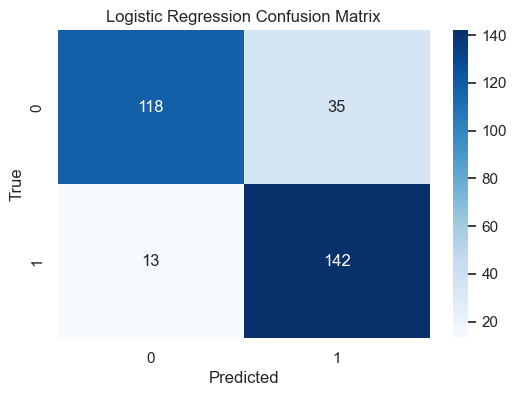

In [6]:
# Model 1: Logistic Regression
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)
y_pred_lr = clf_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

model_names.append('Logistic Regression')
accuracy_scores.append(accuracy_lr)

plot_confusion_matrix(y_test, y_pred_lr, 'Logistic Regression Confusion Matrix')

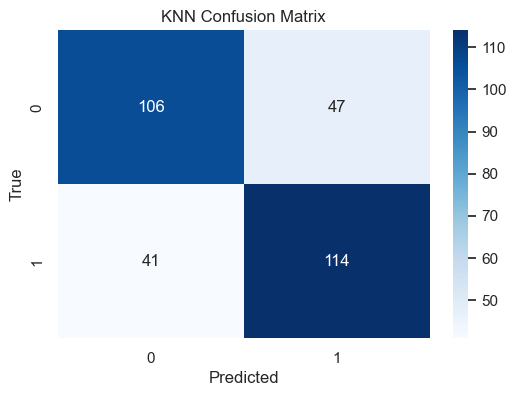

In [7]:
# Model 2: KNN - K-nearest neighbor
clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(X_train, y_train)
y_pred_knn = clf_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

model_names.append('KNN - K-nearest neighbor')
accuracy_scores.append(accuracy_knn)

plot_confusion_matrix(y_test, y_pred_knn, 'KNN Confusion Matrix')


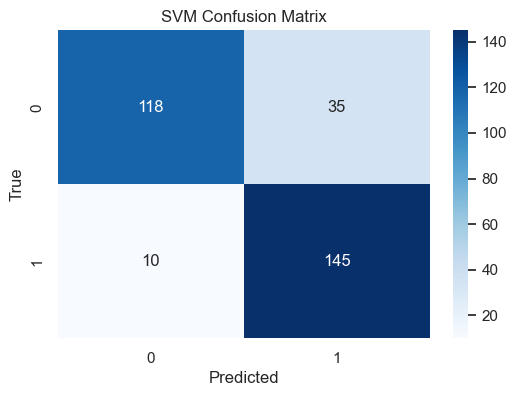

In [8]:
# Model 3: SVM - Support Vector Machines
clf_svm = SVC(kernel='linear', C=1.0, random_state=0)
clf_svm.fit(X_train, y_train)
y_pred_svm = clf_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

model_names.append('SVM - Support Vector Machines')
accuracy_scores.append(accuracy_svm)

plot_confusion_matrix(y_test, y_pred_svm, 'SVM Confusion Matrix')

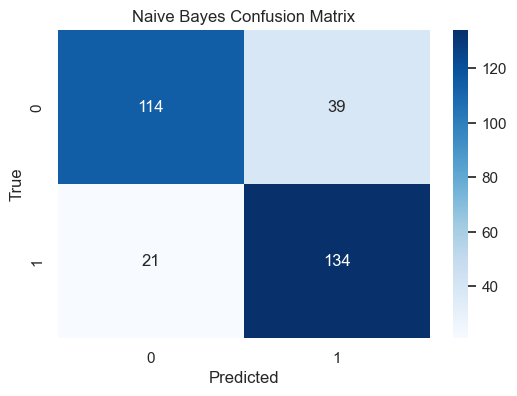

In [9]:
# Model 4: Naive Bayes - Gaussian Naive Bayes
clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)
y_pred_nb = clf_nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

model_names.append('Naive Bayes - Gaussian Naive Bayes')
accuracy_scores.append(accuracy_nb)

plot_confusion_matrix(y_test, y_pred_nb, 'Naive Bayes Confusion Matrix')

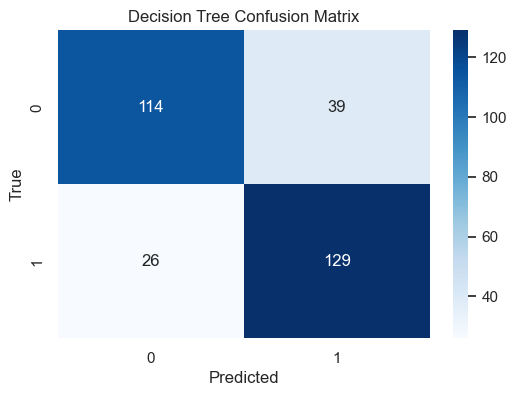

In [10]:
# Model 5: Decision Tree Classifier
clf_dt = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_dt.fit(X_train, y_train)
y_pred_dt = clf_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

model_names.append('Decision Tree Classifier')
accuracy_scores.append(accuracy_dt)

plot_confusion_matrix(y_test, y_pred_dt, 'Decision Tree Confusion Matrix')

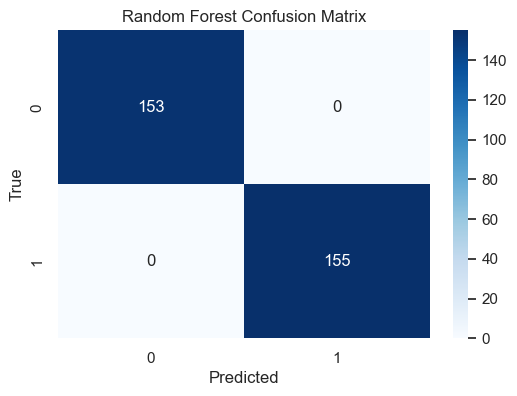

In [11]:
# Model 6: Random Forest Classifier
clf_rf = RandomForestClassifier(n_estimators=100, random_state=0)
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

model_names.append('Random Forest Classifier')
accuracy_scores.append(accuracy_rf)

plot_confusion_matrix(y_test, y_pred_rf, 'Random Forest Confusion Matrix')

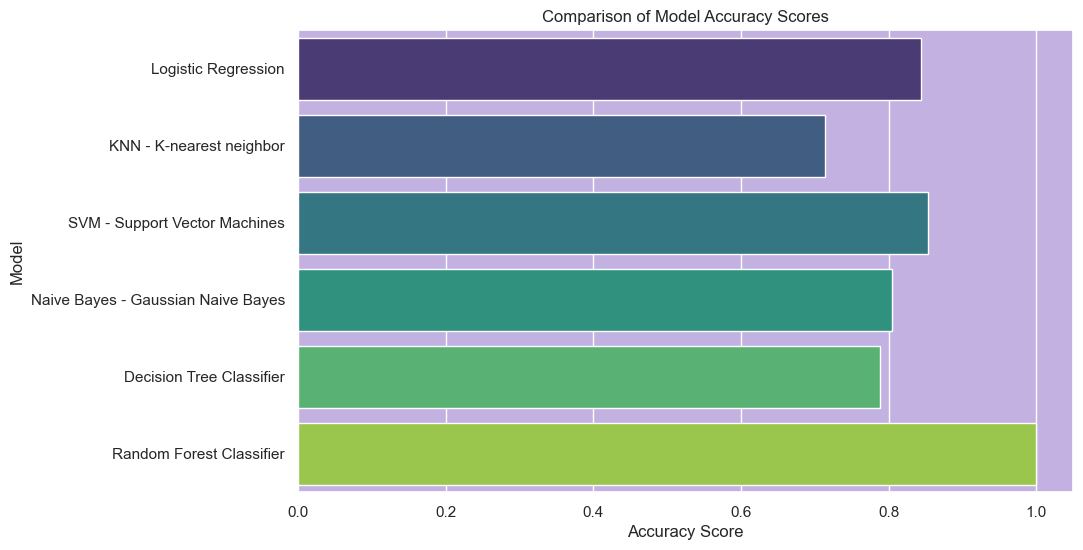

In [12]:
# Plotting the barplot for accuracy comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=accuracy_scores, y=model_names, palette='viridis')
plt.xlabel('Accuracy Score')
plt.ylabel('Model')
plt.title('Comparison of Model Accuracy Scores')
plt.show()